<a href="https://colab.research.google.com/github/abhisheklomsh/Sabudh/blob/master/kmeans_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
%matplotlib inline
from scipy.spatial.distance import cdist

In [0]:
centers=5
X,y= make_blobs(n_samples=2000,n_features=2,centers=centers,cluster_std=1.8)
centers_org,label=make_blobs(n_samples=5,n_features=2,centers=5,cluster_std=1.8)
count=0

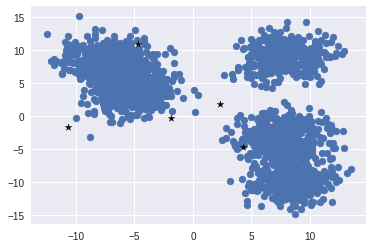

In [0]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(pd.DataFrame(centers_org[:,0]),centers_org[:,1],marker='*', c='#050505')

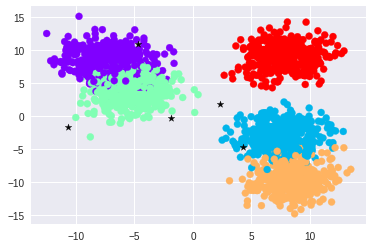

In [0]:
plt.scatter(pd.DataFrame(X[:,0]),X[:,1],cmap='rainbow', c=y)
plt.scatter(pd.DataFrame(centers_org[:,0]),centers_org[:,1],marker='*', c='#050505')
plt.show()

In [0]:
def kmeans(X,y,centers_found,label,count):
    euclidean_dist = cdist(X,centers_found,'euclidean')
    min_dist = np.argmin(euclidean_dist,axis=1)
    hot_encoding1 = np.array(pd.get_dummies(min_dist))
    data = np.dot(hot_encoding1.T,X)
    data = data.T/hot_encoding1.sum(axis=0).T
    centers_found=data.T
    data2=pd.DataFrame(centers_found)
    #plt.scatter(pd.DataFrame(X[:,0]),X[:,1],cmap='rainbow', c=y)
    #plt.scatter(pd.DataFrame(data2[0]),data2[1],marker='*', c='#050505')
    #plt.show()
    count+=1
    colors = ['r','g','b','y','c','m']
    fig,ax = plt.subplots()
    #print(centers)
   
    for i in range(centers):
        points = np.array([X[j] for j in range(len(X)) if min_dist[j]==i])
        #print(points)
        ax.scatter(points[:,0],points[:,1],s=7,c=colors[i])
    ax.scatter(centers_found[:,0],centers_found[:,1],marker='*',s=200,c='orange')
    return centers_found,count

    
    
    
    

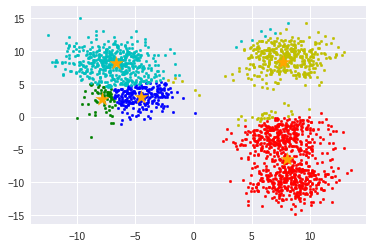

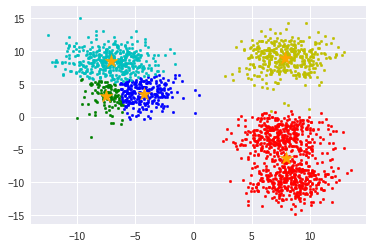

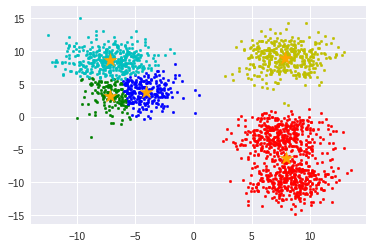

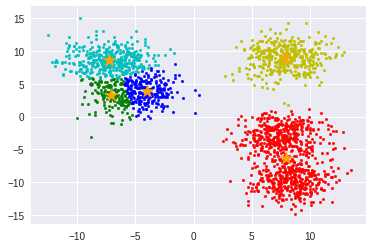

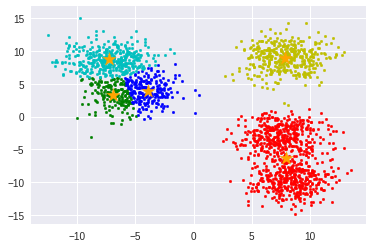

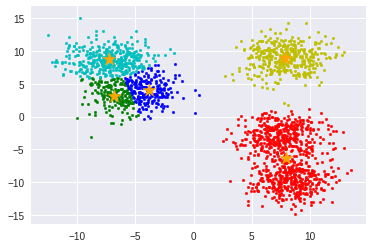

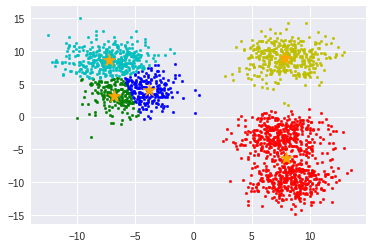

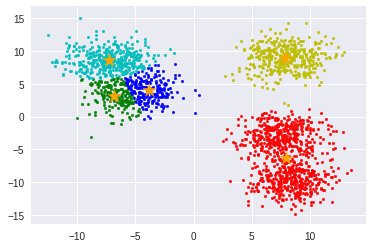

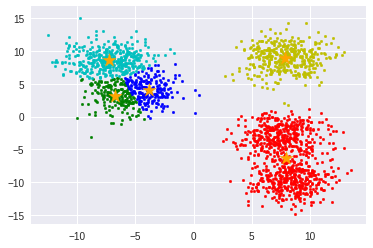

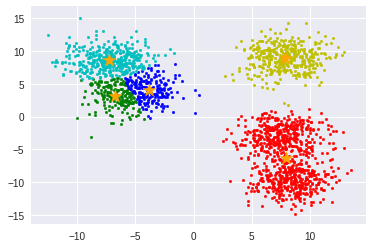

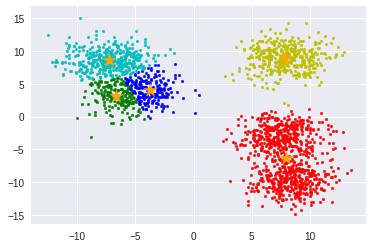

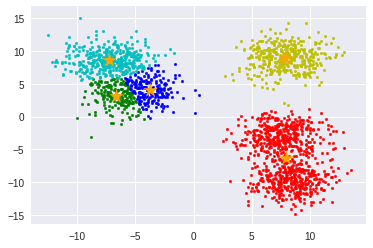

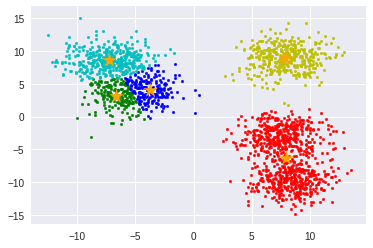

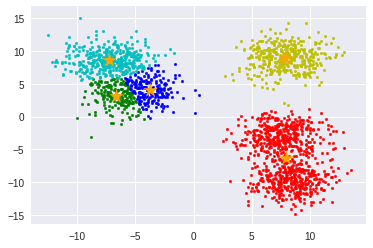

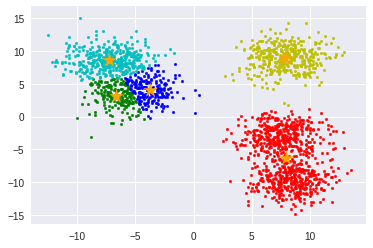

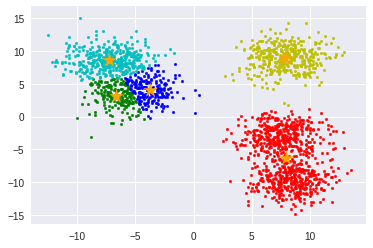

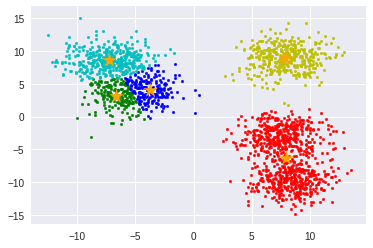

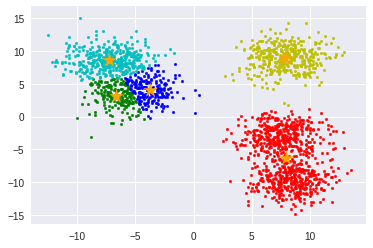

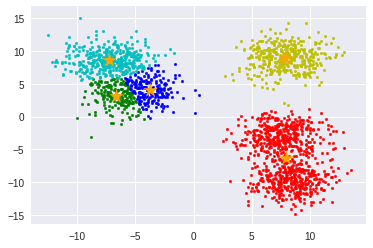

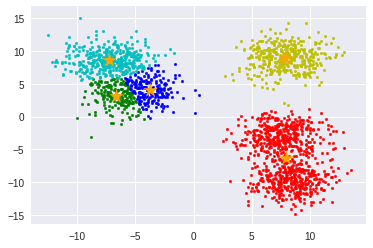

In [0]:
for i in range(20):
    centers_org,count=kmeans(X,y,centers_org,label,count)
    
count=0